In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/butterfly-dataset/leedsbutterfly/README.txt
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0060123.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070074.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0040110.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0040145.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0010035.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0040168.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070066.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0050039.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0080059.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0050075.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0080004.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0070101.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0020142.png
/kaggle/input/butterfly-dataset/leedsbutterfly/images/0040169.png
/kaggle/input/butt

In [45]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from matplotlib import pyplot
from matplotlib.image import imread
import sys
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print(os.listdir("../input/butterfly-dataset/leedsbutterfly/images/"))

['0060123.png', '0070074.png', '0040110.png', '0040145.png', '0010035.png', '0040168.png', '0070066.png', '0050039.png', '0080059.png', '0050075.png', '0080004.png', '0070101.png', '0020142.png', '0040169.png', '0030039.png', '0090109.png', '0010052.png', '0050055.png', '0060021.png', '0100163.png', '0020074.png', '0010014.png', '0070043.png', '0070112.png', '0060072.png', '0070078.png', '0060138.png', '0090212.png', '0090076.png', '0030030.png', '0060179.png', '0060186.png', '0090204.png', '0090084.png', '0060084.png', '0090144.png', '0030060.png', '0090127.png', '0070052.png', '0010085.png', '0030010.png', '0040019.png', '0020026.png', '0020135.png', '0020004.png', '0050077.png', '0070007.png', '0100047.png', '0020146.png', '0050070.png', '0090032.png', '0020088.png', '0010057.png', '0010065.png', '0040104.png', '0070055.png', '0060171.png', '0080001.png', '0050091.png', '0020133.png', '0010037.png', '0010005.png', '0100009.png', '0090011.png', '0030047.png', '0060127.png', '0060087.

In [46]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [47]:
filenames = os.listdir("../input/butterfly-dataset/leedsbutterfly/images/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category[0:3])

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()
df.shape

,filename,category
0,0060123.png,006
1,0070074.png,007
2,0040110.png,004
3,0040145.png,004
4,0010035.png,001


(832, 2)

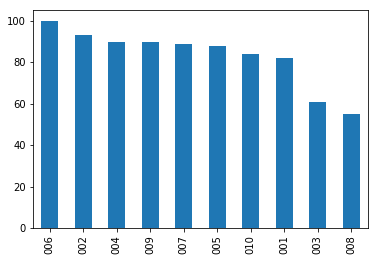

In [48]:
df['category'].value_counts().plot.bar()

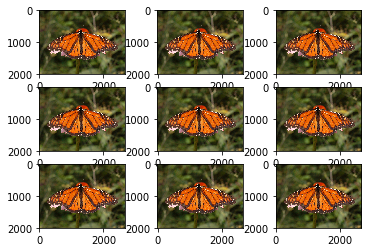

In [49]:
# define location of dataset
folder = '../input/butterfly-dataset/leedsbutterfly/images/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + '0010009.png'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

In [ ]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df['category'].value_counts().plot.bar()
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/butterfly-dataset/leedsbutterfly/images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/butterfly-dataset/leedsbutterfly/images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../input/butterfly-dataset/leedsbutterfly/images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=1,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [ ]:
model.save_weights("model.h5")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("../input/butterfly-dataset/leedsbutterfly/images/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/butterfly-dataset/leedsbutterfly/images/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'})
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../input/butterfly-dataset/leedsbutterfly/images/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()